In [2]:
import pickle
import os

# Read and print keys from patient4.pkl
file_path = os.path.join('patsfilter', 'patient4.pkl')
with open(file_path, 'rb') as f:
    data = pickle.load(f)

print(f"Keys in patient4.pkl:")
if isinstance(data, dict):
    print(list(data.keys()))
else:
    print(f"Not a dictionary, type: {type(data)}")


Keys in patient4.pkl:
['Name', 'Athlete', 'real initial time', 'hr_time', 'hr_values', 'hr_mean', 'hr_baseline', 'hr_base', 'hr1', 'hr1_mean', 'hr2', 'hr2_mean', 'hr3', 'hr3_mean', 'game mark', 'RT', 'RT_mean', 'RTt', 'RTt_mean', 'RT1', 'RT1_mean', 'RT2', 'RT2_mean', 'RT3', 'RT3_mean']


In [ ]:
# maybe fix block hrs based on hr_base (because they are based on hr_values)
# fixed in later blocked

# RT plots

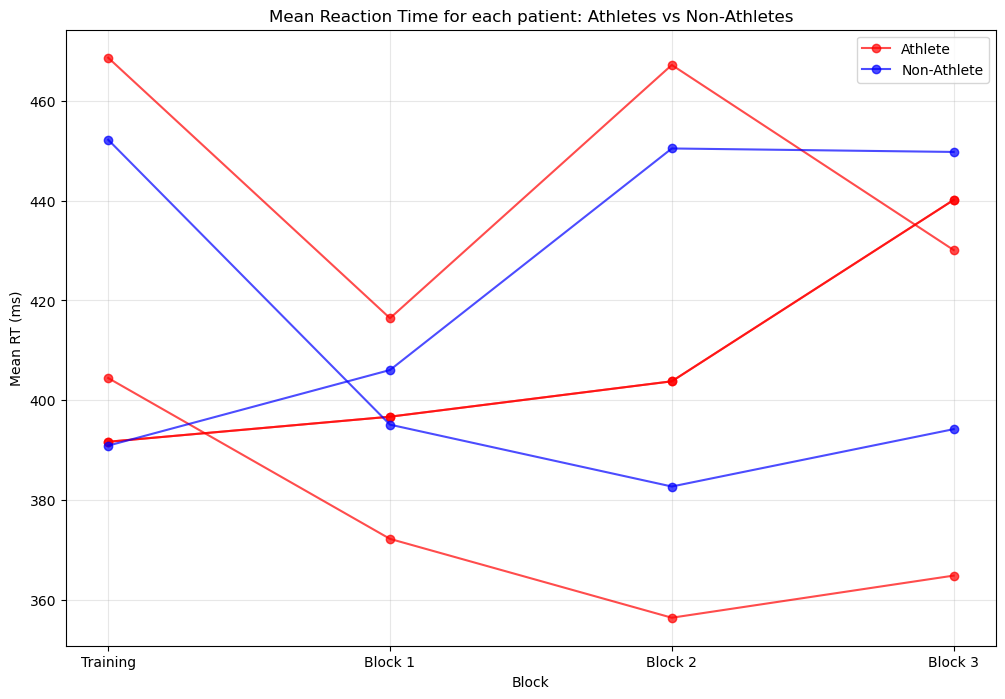

Athletes: 4 patients
Non-athletes: 2 patients


In [5]:
import numpy as np

import matplotlib.pyplot as plt

# Initialize lists to store data
all_patients = []
athletes = []
non_athletes = []

# Read all pickle files
for pkl_file in pkl_files:
    file_path = os.path.join('patsfilter', pkl_file)
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Extract RT means for each block
    rt_means = [
        patient_data['RTt_mean'],  # Training block
        patient_data['RT1_mean'],  # Block 1
        patient_data['RT2_mean'],  # Block 2
        patient_data['RT3_mean']   # Block 3
    ]
    
    # Store patient info
    patient_info = {
        'name': patient_data['Name'],
        'athlete': patient_data['Athlete'],
        'rt_means': rt_means
    }
    all_patients.append(patient_info)
    
    # Separate by athlete status
    if patient_data['Athlete'] == 1:
        athletes.append(patient_info)
    else:
        non_athletes.append(patient_info)

# Create the plot
plt.figure(figsize=(12, 8))
blocks = ['Training', 'Block 1', 'Block 2', 'Block 3']

# Plot athletes
for athlete in athletes:
    plt.plot(blocks, athlete['rt_means'], 'o-', color='red', alpha=0.7, 
             label='Athlete' if athlete == athletes[0] else "")

# Plot non-athletes
for non_athlete in non_athletes:
    plt.plot(blocks, non_athlete['rt_means'], 'o-', color='blue', alpha=0.7,
             label='Non-Athlete' if non_athlete == non_athletes[0] else "")

plt.xlabel('Block')
plt.ylabel('Mean RT (ms)')
plt.title('Mean Reaction Time for each patient: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary
print(f"Athletes: {len(athletes)} patients")
print(f"Non-athletes: {len(non_athletes)} patients")

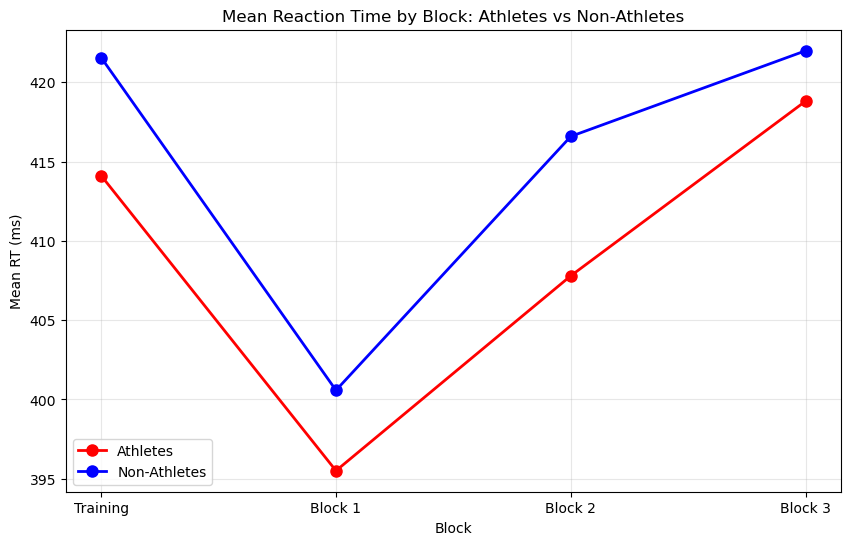

Athletes mean RT by block: ['414.11', '395.51', '407.80', '418.81']
Non-athletes mean RT by block: ['421.56', '400.58', '416.58', '421.98']


In [4]:
# Calculate mean RT for each block for athletes and non-athletes
athlete_rt_means = []
non_athlete_rt_means = []

# Calculate means for each block
for block_idx in range(4):  # 4 blocks: Training, Block 1, Block 2, Block 3
    # Athletes mean for this block
    athlete_block_rts = [athlete['rt_means'][block_idx] for athlete in athletes]
    athlete_rt_means.append(np.mean(athlete_block_rts))
    
    # Non-athletes mean for this block
    non_athlete_block_rts = [non_athlete['rt_means'][block_idx] for non_athlete in non_athletes]
    non_athlete_rt_means.append(np.mean(non_athlete_block_rts))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean lines
plt.plot(blocks, athlete_rt_means, 'o-', color='red', linewidth=2, markersize=8, label='Athletes')
plt.plot(blocks, non_athlete_rt_means, 'o-', color='blue', linewidth=2, markersize=8, label='Non-Athletes')

plt.xlabel('Block')
plt.ylabel('Mean RT (ms)')
plt.title('Mean Reaction Time by Block: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print the values
print("Athletes mean RT by block:", [f"{rt:.2f}" for rt in athlete_rt_means])
print("Non-athletes mean RT by block:", [f"{rt:.2f}" for rt in non_athlete_rt_means])

C:\Users\georg\AppData\Local\Temp\ipykernel_4284\2188292052.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\2188292052.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\2188292052.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\218829

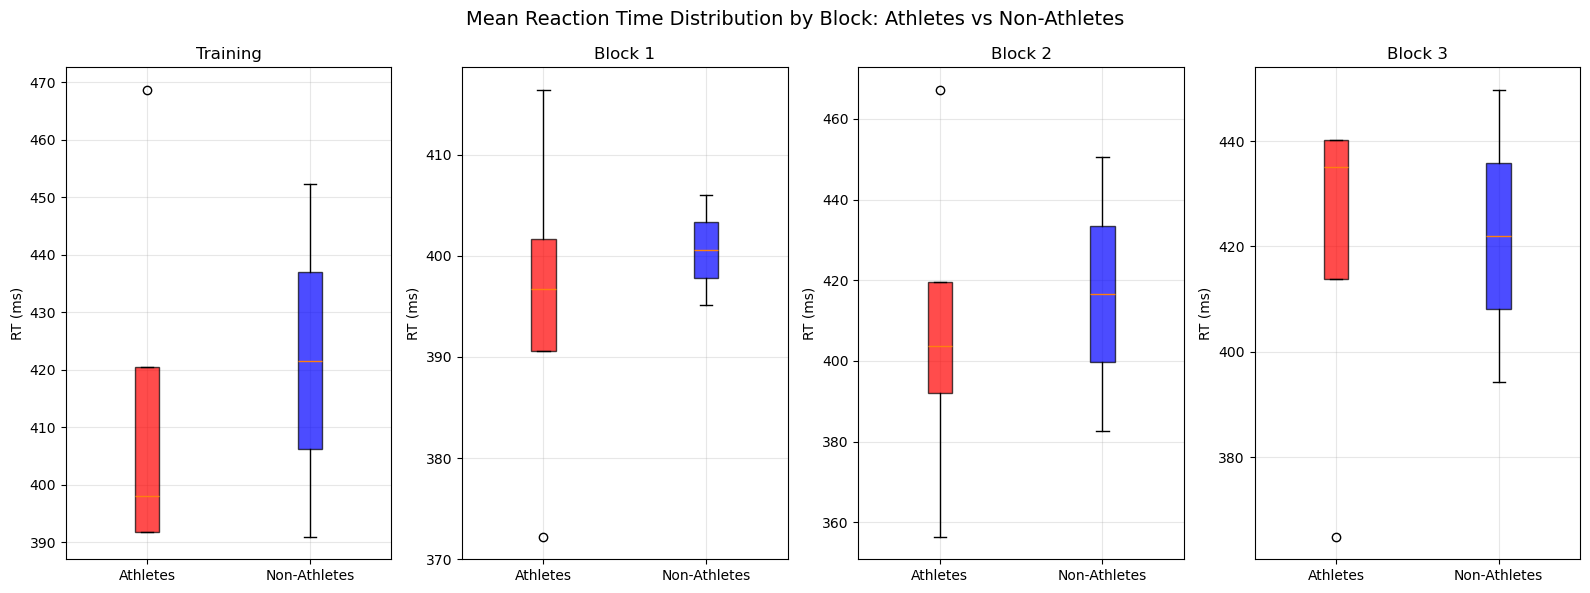

In [10]:
# Create box plots (similar to candles) for RT values by block and athlete status
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

for block_idx in range(4):
    # Collect RT values for this block
    athlete_rts = [athlete['rt_means'][block_idx] for athlete in athletes]
    non_athlete_rts = [non_athlete['rt_means'][block_idx] for non_athlete in non_athletes]
    
    # Create box plot for this block
    box_data = [athlete_rts, non_athlete_rts]
    box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'], 
                                  patch_artist=True)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('red')
    box['boxes'][0].set_alpha(0.7)
    box['boxes'][1].set_facecolor('blue')
    box['boxes'][1].set_alpha(0.7)
    
    axes[block_idx].set_title(f'{blocks[block_idx]}')
    axes[block_idx].set_ylabel('RT (ms)')
    axes[block_idx].grid(True, alpha=0.3)

plt.suptitle('Mean Reaction Time Distribution by Block: Athletes vs Non-Athletes', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_4284\186354990.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\186354990.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\186354990.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\186354990

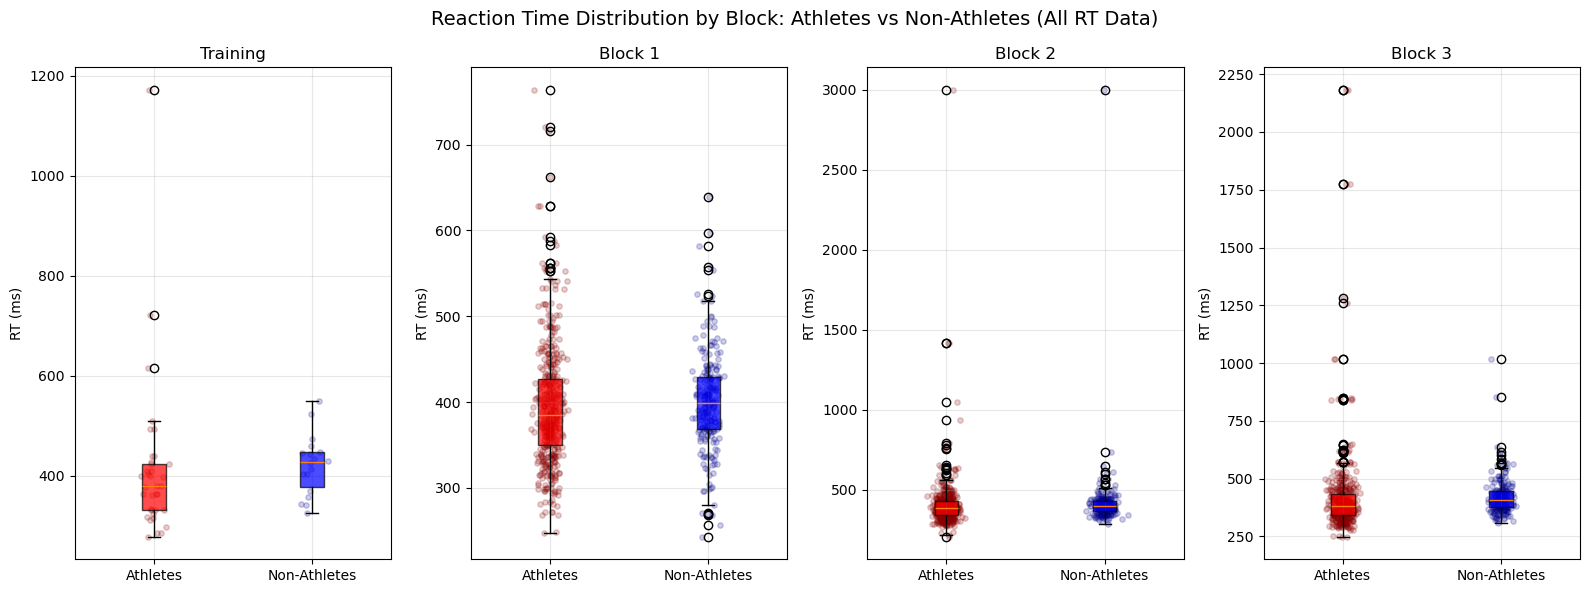

In [9]:
# Create box plots with individual data points using raw RT data
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Block names and corresponding RT keys
block_keys = ['RTt', 'RT1', 'RT2', 'RT3']

for block_idx in range(4):
    # Collect all RT values for this block
    athlete_rts = []
    non_athlete_rts = []
    
    # Get raw RT data for each patient
    for patient in all_patients:
        # Load patient data to get raw RT values
        file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
        with open(file_path, 'rb') as f:
            patient_data = pickle.load(f)
        
        rt_values = patient_data[block_keys[block_idx]]
        
        if patient['athlete'] == 1:
            athlete_rts.extend(rt_values)
        else:
            non_athlete_rts.extend(rt_values)
    
    # Add individual data points behind the boxes (lower zorder)
    # Athletes points (position 1)
    x_athletes = np.random.normal(1, 0.04, len(athlete_rts))
    axes[block_idx].scatter(x_athletes, athlete_rts, color='darkred', alpha=0.2, s=15, zorder=1)
    
    # Non-athletes points (position 2)
    x_non_athletes = np.random.normal(2, 0.04, len(non_athlete_rts))
    axes[block_idx].scatter(x_non_athletes, non_athlete_rts, color='darkblue', alpha=0.2, s=15, zorder=1)
    
    # Create box plot for this block (higher zorder to appear on top)
    box_data = [athlete_rts, non_athlete_rts]
    box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'], 
                                  patch_artist=True, zorder=2)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('red')
    box['boxes'][0].set_alpha(0.7)
    box['boxes'][1].set_facecolor('blue')
    box['boxes'][1].set_alpha(0.7)
    
    axes[block_idx].set_title(f'{blocks[block_idx]}')
    axes[block_idx].set_ylabel('RT (ms)')
    axes[block_idx].grid(True, alpha=0.3)

plt.suptitle('Reaction Time Distribution by Block: Athletes vs Non-Athletes (All RT Data)', fontsize=14)
plt.tight_layout()
plt.show()

# HR plots

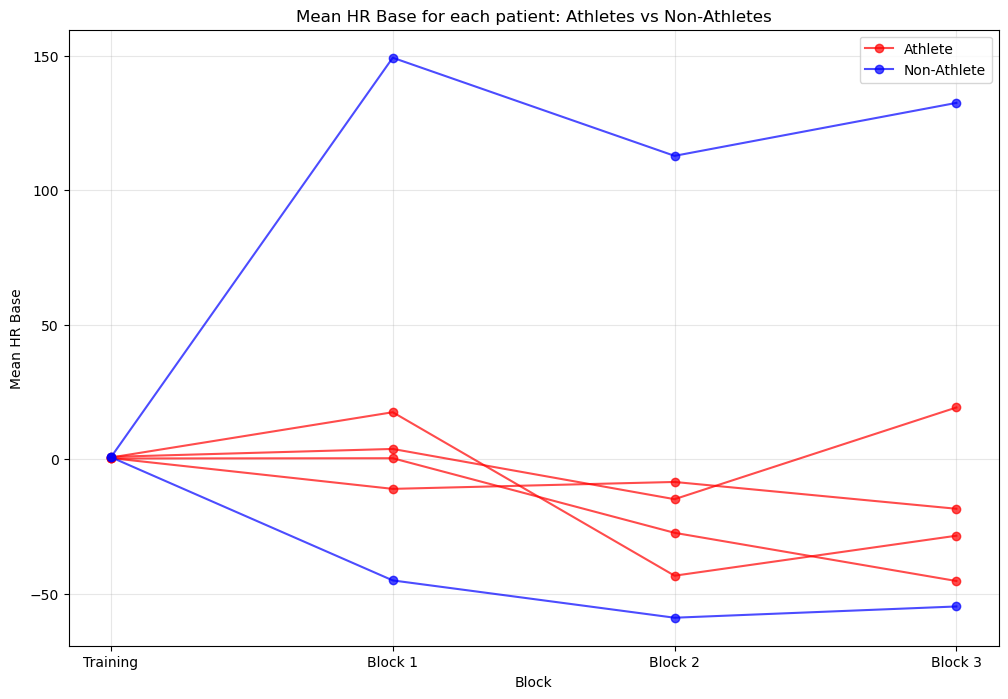

Athletes: 4 patients
Non-athletes: 2 patients


In [11]:
# Initialize lists to store HR base data
all_patients_hr = []
athletes_hr = []
non_athletes_hr = []

# Read all pickle files and extract HR base data
for patient in all_patients:
    file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
    with open(file_path, 'rb') as f:
        patient_data = pickle.load(f)
    
    # Get hr_base data and divide into 4 equal parts
    hr_base = patient_data['hr_base']
    total_length = len(hr_base)
    part_size = total_length // 4
    
    # Divide into 4 blocks
    hr_blocks = [
        hr_base[:part_size],                           # Training block
        hr_base[part_size:2*part_size],               # Block 1
        hr_base[2*part_size:3*part_size],             # Block 2
        hr_base[3*part_size:4*part_size]              # Block 3
    ]
    
    # Calculate means for each block
    hr_means = [np.mean(block) for block in hr_blocks]
    
    # Store patient HR info
    patient_hr_info = {
        'name': patient['name'],
        'athlete': patient['athlete'],
        'hr_means': hr_means
    }
    all_patients_hr.append(patient_hr_info)
    
    # Separate by athlete status
    if patient['athlete'] == 1:
        athletes_hr.append(patient_hr_info)
    else:
        non_athletes_hr.append(patient_hr_info)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot athletes
for athlete in athletes_hr:
    plt.plot(blocks, athlete['hr_means'], 'o-', color='red', alpha=0.7, 
             label='Athlete' if athlete == athletes_hr[0] else "")

# Plot non-athletes
for non_athlete in non_athletes_hr:
    plt.plot(blocks, non_athlete['hr_means'], 'o-', color='blue', alpha=0.7,
             label='Non-Athlete' if non_athlete == non_athletes_hr[0] else "")

plt.xlabel('Block')
plt.ylabel('Mean HR Base')
plt.title('Mean HR Base for each patient: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary
print(f"Athletes: {len(athletes_hr)} patients")
print(f"Non-athletes: {len(non_athletes_hr)} patients")

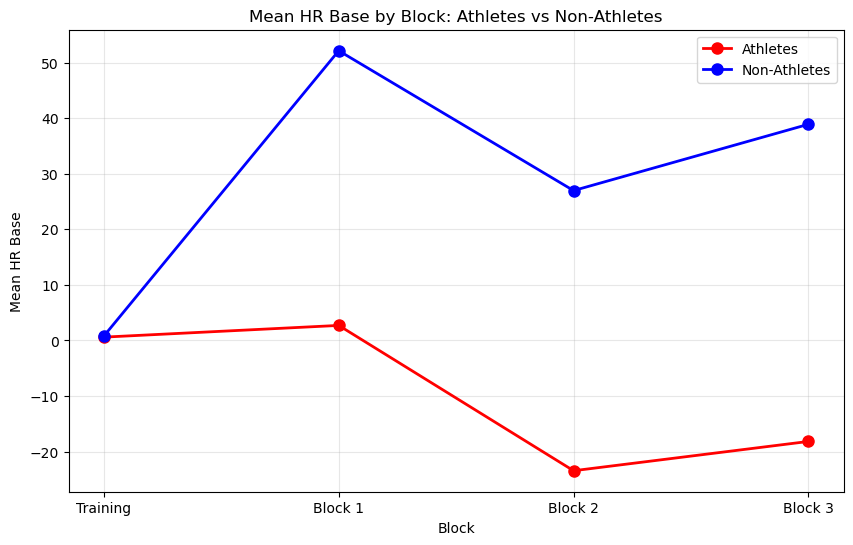

Athletes mean HR Base by block: ['0.60', '2.71', '-23.44', '-18.17']
Non-athletes mean HR Base by block: ['0.80', '52.15', '26.98', '38.91']


In [12]:
# Calculate mean HR for each block for athletes and non-athletes
athlete_hr_means = []
non_athlete_hr_means = []

# Calculate means for each block
for block_idx in range(4):  # 4 blocks: Training, Block 1, Block 2, Block 3
    # Athletes mean for this block
    athlete_block_hrs = [athlete['hr_means'][block_idx] for athlete in athletes_hr]
    athlete_hr_means.append(np.mean(athlete_block_hrs))
    
    # Non-athletes mean for this block
    non_athlete_block_hrs = [non_athlete['hr_means'][block_idx] for non_athlete in non_athletes_hr]
    non_athlete_hr_means.append(np.mean(non_athlete_block_hrs))

# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean lines
plt.plot(blocks, athlete_hr_means, 'o-', color='red', linewidth=2, markersize=8, label='Athletes')
plt.plot(blocks, non_athlete_hr_means, 'o-', color='blue', linewidth=2, markersize=8, label='Non-Athletes')

plt.xlabel('Block')
plt.ylabel('Mean HR Base')
plt.title('Mean HR Base by Block: Athletes vs Non-Athletes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print the values
print("Athletes mean HR Base by block:", [f"{hr:.2f}" for hr in athlete_hr_means])
print("Non-athletes mean HR Base by block:", [f"{hr:.2f}" for hr in non_athlete_hr_means])

C:\Users\georg\AppData\Local\Temp\ipykernel_4284\269692759.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\269692759.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\269692759.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\269692759

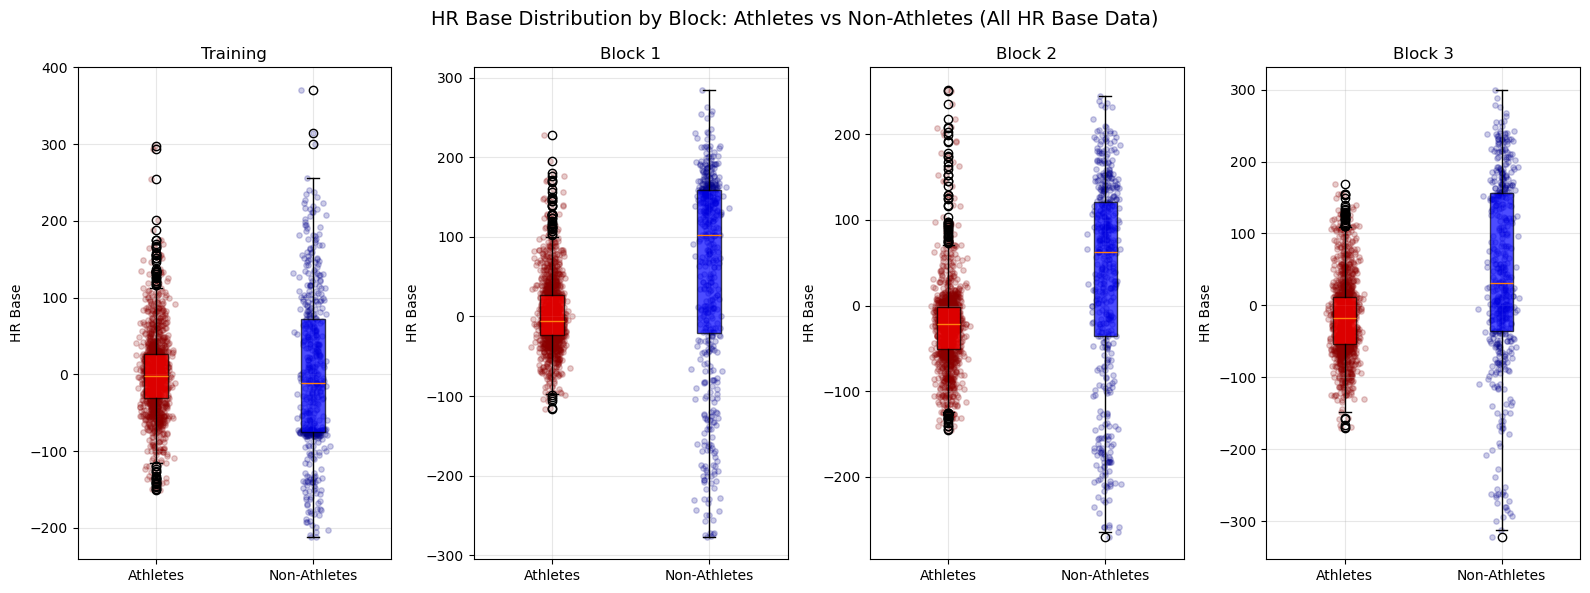

In [13]:
# Create box plots with individual data points using hr_base data divided into 4 blocks
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

for block_idx in range(4):
    # Collect all HR base values for this block
    athlete_hrs = []
    non_athlete_hrs = []
    
    # Get hr_base data for each patient
    for patient in all_patients:
        # Load patient data to get hr_base values
        file_path = os.path.join('patsfilter', f"{patient['name']}.pkl")
        with open(file_path, 'rb') as f:
            patient_data = pickle.load(f)
        
        # Get hr_base and divide into 4 equal parts
        hr_base = patient_data['hr_base']
        total_length = len(hr_base)
        part_size = total_length // 4
        
        # Get the specific block
        if block_idx == 0:
            hr_block = hr_base[:part_size]
        elif block_idx == 1:
            hr_block = hr_base[part_size:2*part_size]
        elif block_idx == 2:
            hr_block = hr_base[2*part_size:3*part_size]
        else:  # block_idx == 3
            hr_block = hr_base[3*part_size:4*part_size]
        
        if patient['athlete'] == 1:
            athlete_hrs.extend(hr_block)
        else:
            non_athlete_hrs.extend(hr_block)
    
    # Add individual data points behind the boxes (lower zorder)
    # Athletes points (position 1)
    x_athletes = np.random.normal(1, 0.04, len(athlete_hrs))
    axes[block_idx].scatter(x_athletes, athlete_hrs, color='darkred', alpha=0.2, s=15, zorder=1)
    
    # Non-athletes points (position 2)
    x_non_athletes = np.random.normal(2, 0.04, len(non_athlete_hrs))
    axes[block_idx].scatter(x_non_athletes, non_athlete_hrs, color='darkblue', alpha=0.2, s=15, zorder=1)
    
    # Create box plot for this block (higher zorder to appear on top)
    box_data = [athlete_hrs, non_athlete_hrs]
    box = axes[block_idx].boxplot(box_data, labels=['Athletes', 'Non-Athletes'], 
                                  patch_artist=True, zorder=2)
    
    # Color the boxes
    box['boxes'][0].set_facecolor('red')
    box['boxes'][0].set_alpha(0.7)
    box['boxes'][1].set_facecolor('blue')
    box['boxes'][1].set_alpha(0.7)
    
    axes[block_idx].set_title(f'{blocks[block_idx]}')
    axes[block_idx].set_ylabel('HR Base')
    axes[block_idx].grid(True, alpha=0.3)

plt.suptitle('HR Base Distribution by Block: Athletes vs Non-Athletes (All HR Base Data)', fontsize=14)
plt.tight_layout()
plt.show()

# statistical test

C:\Users\georg\AppData\Local\Temp\ipykernel_4284\2883465311.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0,1].boxplot([athlete_data, non_athlete_data],
C:\Users\georg\AppData\Local\Temp\ipykernel_4284\2883465311.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[0,2].boxplot([block1_data, block2_data, block3_data],


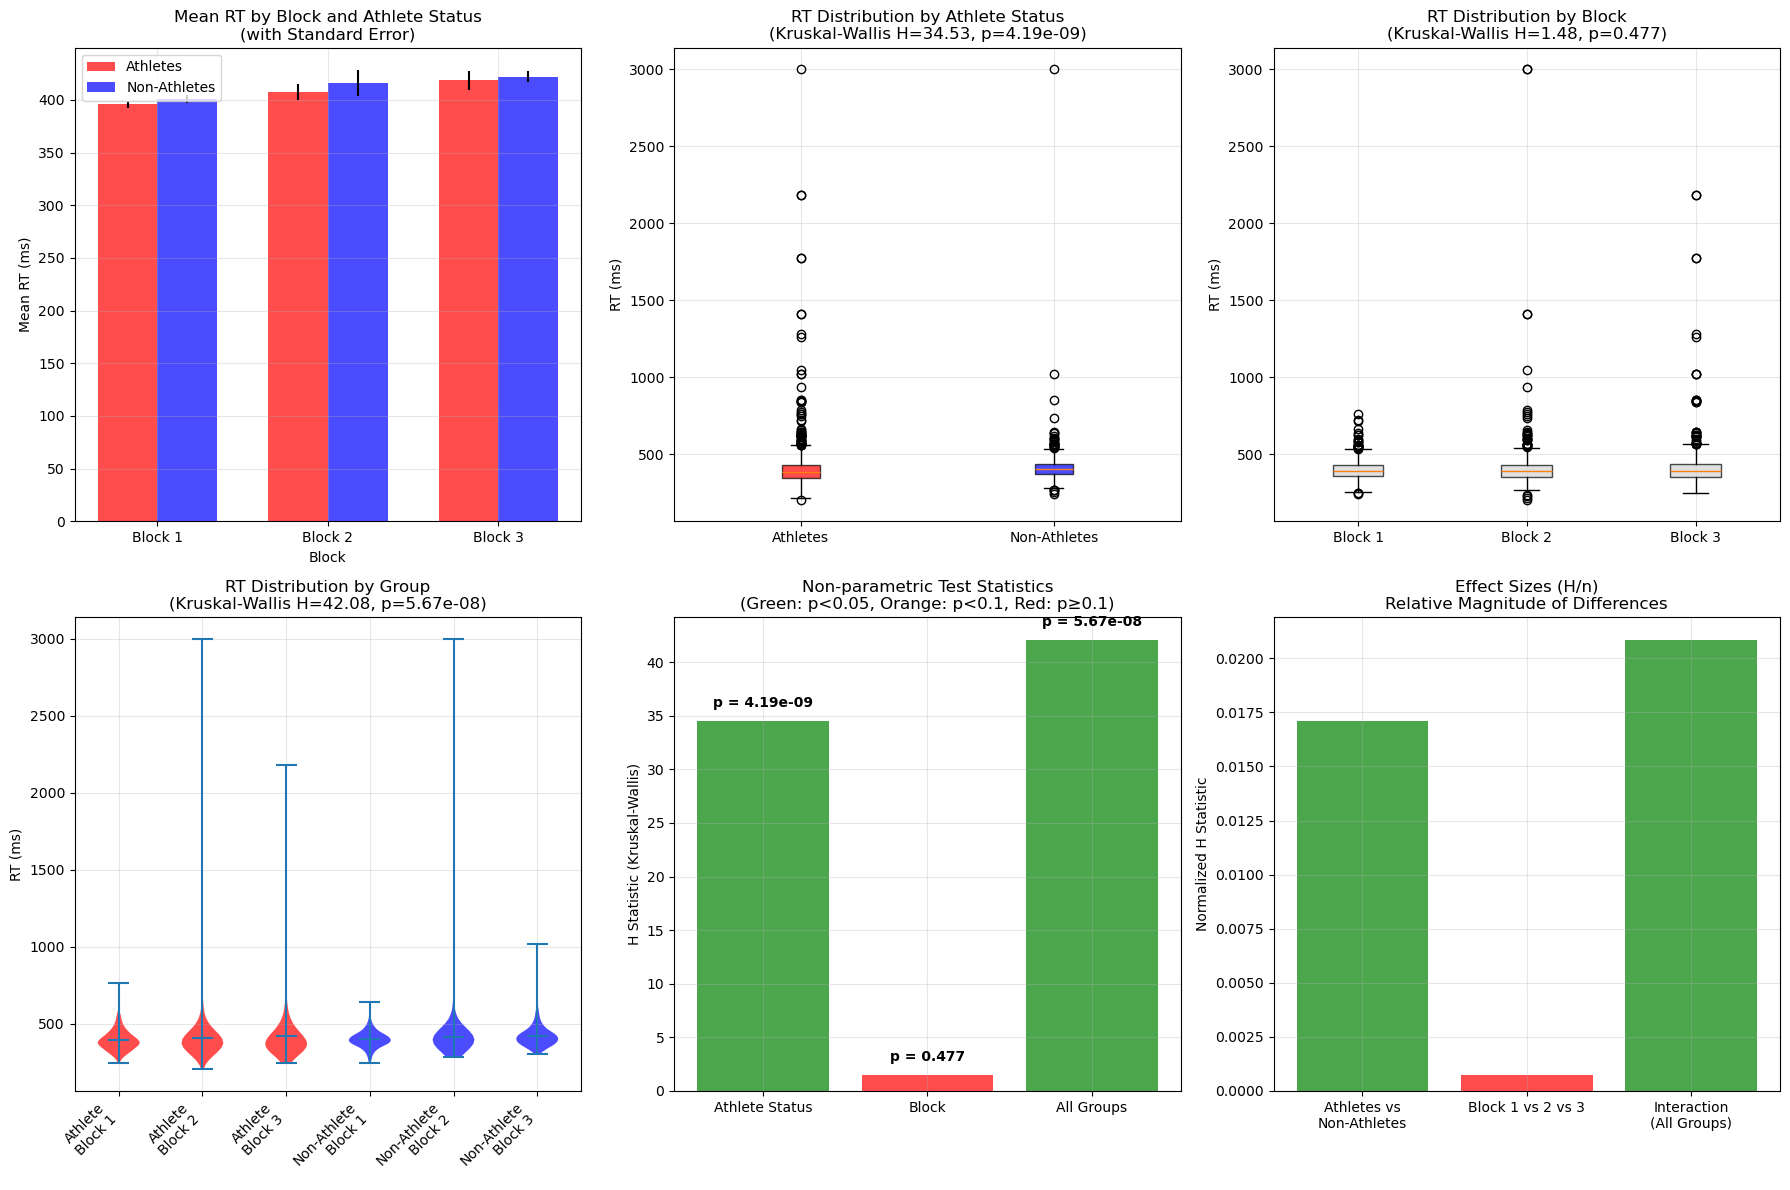


DETAILED STATISTICAL SUMMARY
Total observations: 2018
Athletes: 1346 observations
Non-athletes: 672 observations

Group means and standard deviations:
                          mean     std  count
Athlete_Status Block                         
Athlete        Block 1  395.63   71.90    451
               Block 2  407.25  166.13    445
               Block 3  418.57  187.52    450
Non-Athlete    Block 1  400.60   57.57    223
               Block 2  415.83  182.96    225
               Block 3  421.74   76.99    224

Overall RT statistics:
Mean RT: 409.01 ms
Standard deviation: 141.02 ms
Median RT: 391.00 ms

Significant effects (p < 0.05):
✓ Main effect of Athlete Status: H = 34.535, p = 4.19e-09
✓ Interaction effect: H = 42.083, p = 5.67e-08


In [19]:
# Add plots to visualize the non-parametric test results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Mean RT by Block and Athlete Status
means_data = df_anova.groupby(['Athlete_Status', 'Block'])['RT'].agg(['mean', 'std', 'count']).reset_index()
athlete_means = means_data[means_data['Athlete_Status'] == 'Athlete']
non_athlete_means = means_data[means_data['Athlete_Status'] == 'Non-Athlete']

x_pos = np.arange(len(['Block 1', 'Block 2', 'Block 3']))
width = 0.35

axes[0,0].bar(x_pos - width/2, athlete_means['mean'], width, label='Athletes', 
              color='red', alpha=0.7, yerr=athlete_means['std']/np.sqrt(athlete_means['count']))
axes[0,0].bar(x_pos + width/2, non_athlete_means['mean'], width, label='Non-Athletes', 
              color='blue', alpha=0.7, yerr=non_athlete_means['std']/np.sqrt(non_athlete_means['count']))

axes[0,0].set_xlabel('Block')
axes[0,0].set_ylabel('Mean RT (ms)')
axes[0,0].set_title('Mean RT by Block and Athlete Status\n(with Standard Error)')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(['Block 1', 'Block 2', 'Block 3'])
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Box plots by Athlete Status
athlete_data = df_anova[df_anova['Athlete_Status'] == 'Athlete']['RT']
non_athlete_data = df_anova[df_anova['Athlete_Status'] == 'Non-Athlete']['RT']

bp1 = axes[0,1].boxplot([athlete_data, non_athlete_data], 
                        labels=['Athletes', 'Non-Athletes'], patch_artist=True)
bp1['boxes'][0].set_facecolor('red')
bp1['boxes'][0].set_alpha(0.7)
bp1['boxes'][1].set_facecolor('blue')
bp1['boxes'][1].set_alpha(0.7)

axes[0,1].set_ylabel('RT (ms)')
axes[0,1].set_title(f'RT Distribution by Athlete Status\n(Kruskal-Wallis H={h_athlete:.2f}, p={p_athlete:.2e})')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Box plots by Block
block1_data = df_anova[df_anova['Block'] == 'Block 1']['RT']
block2_data = df_anova[df_anova['Block'] == 'Block 2']['RT']
block3_data = df_anova[df_anova['Block'] == 'Block 3']['RT']

bp2 = axes[0,2].boxplot([block1_data, block2_data, block3_data], 
                        labels=['Block 1', 'Block 2', 'Block 3'], patch_artist=True)
for box in bp2['boxes']:
    box.set_facecolor('lightgray')
    box.set_alpha(0.7)

axes[0,2].set_ylabel('RT (ms)')
axes[0,2].set_title(f'RT Distribution by Block\n(Kruskal-Wallis H={h_block:.2f}, p={p_block:.3f})')
axes[0,2].grid(True, alpha=0.3)

# Plot 4: Violin plot for interaction
interaction_data = []
interaction_labels = []
colors = []
for i, athlete_status in enumerate(['Athlete', 'Non-Athlete']):
    for j, block in enumerate(['Block 1', 'Block 2', 'Block 3']):
        data = df_anova[(df_anova['Athlete_Status'] == athlete_status) & 
                       (df_anova['Block'] == block)]['RT'].values
        interaction_data.append(data)
        interaction_labels.append(f"{athlete_status}\n{block}")
        colors.append('red' if athlete_status == 'Athlete' else 'blue')

parts = axes[1,0].violinplot(interaction_data, positions=range(len(interaction_data)), showmeans=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

axes[1,0].set_xticks(range(len(interaction_labels)))
axes[1,0].set_xticklabels(interaction_labels, rotation=45, ha='right')
axes[1,0].set_ylabel('RT (ms)')
axes[1,0].set_title(f'RT Distribution by Group\n(Kruskal-Wallis H={h_interaction:.2f}, p={p_interaction:.2e})')
axes[1,0].grid(True, alpha=0.3)

# Plot 5: Test statistics comparison
test_names = ['Athlete Status', 'Block', 'All Groups']
h_values = [h_athlete, h_block, h_interaction]
p_values = [p_athlete, p_block, p_interaction]

bar_colors = ['green' if p < 0.05 else 'orange' if p < 0.1 else 'red' for p in p_values]
bars = axes[1,1].bar(test_names, h_values, color=bar_colors, alpha=0.7)

axes[1,1].set_ylabel('H Statistic (Kruskal-Wallis)')
axes[1,1].set_title('Non-parametric Test Statistics\n(Green: p<0.05, Orange: p<0.1, Red: p≥0.1)')
axes[1,1].grid(True, alpha=0.3)

# Add p-values as text on bars
for bar, p_val in zip(bars, p_values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'p = {p_val:.2e}' if p_val < 0.001 else f'p = {p_val:.3f}', 
                   ha='center', va='bottom', fontweight='bold')

# Plot 6: Effect sizes visualization
effects = ['Athletes vs\nNon-Athletes', 'Block 1 vs 2 vs 3', 'Interaction\n(All Groups)']
effect_sizes = [h_athlete/len(df_anova), h_block/len(df_anova), h_interaction/len(df_anova)]

axes[1,2].bar(effects, effect_sizes, color=['green', 'red', 'green'], alpha=0.7)
axes[1,2].set_ylabel('Normalized H Statistic')
axes[1,2].set_title('Effect Sizes (H/n)\nRelative Magnitude of Differences')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*60)
print("DETAILED STATISTICAL SUMMARY")
print("="*60)
print(f"Total observations: {len(df_anova)}")
print(f"Athletes: {sum(1 for x in athlete_labels if x == 'Athlete')} observations")
print(f"Non-athletes: {sum(1 for x in athlete_labels if x == 'Non-Athlete')} observations")

print("\nGroup means and standard deviations:")
summary_stats = df_anova.groupby(['Athlete_Status', 'Block'])['RT'].agg(['mean', 'std', 'count']).round(2)
print(summary_stats)

print(f"\nOverall RT statistics:")
print(f"Mean RT: {df_anova['RT'].mean():.2f} ms")
print(f"Standard deviation: {df_anova['RT'].std():.2f} ms")
print(f"Median RT: {df_anova['RT'].median():.2f} ms")

print(f"\nSignificant effects (p < 0.05):")
if p_athlete < 0.05:
    print(f"✓ Main effect of Athlete Status: H = {h_athlete:.3f}, p = {p_athlete:.2e}")
if p_block < 0.05:
    print(f"✓ Main effect of Block: H = {h_block:.3f}, p = {p_block:.3f}")
if p_interaction < 0.05:
    print(f"✓ Interaction effect: H = {h_interaction:.3f}, p = {p_interaction:.2e}")

if not any([p_athlete < 0.05, p_block < 0.05, p_interaction < 0.05]):
    print("No significant effects found.")


=== Scheirer-Ray-Hare Test Results ===
Main effect - Athlete Status: H = 34.5335, df = 1, p = 0.000000
Main effect - Block: H = 1.4815, df = 2, p = 0.476759
Interaction effect: H = 6.0662, df = 2, p = 0.048166


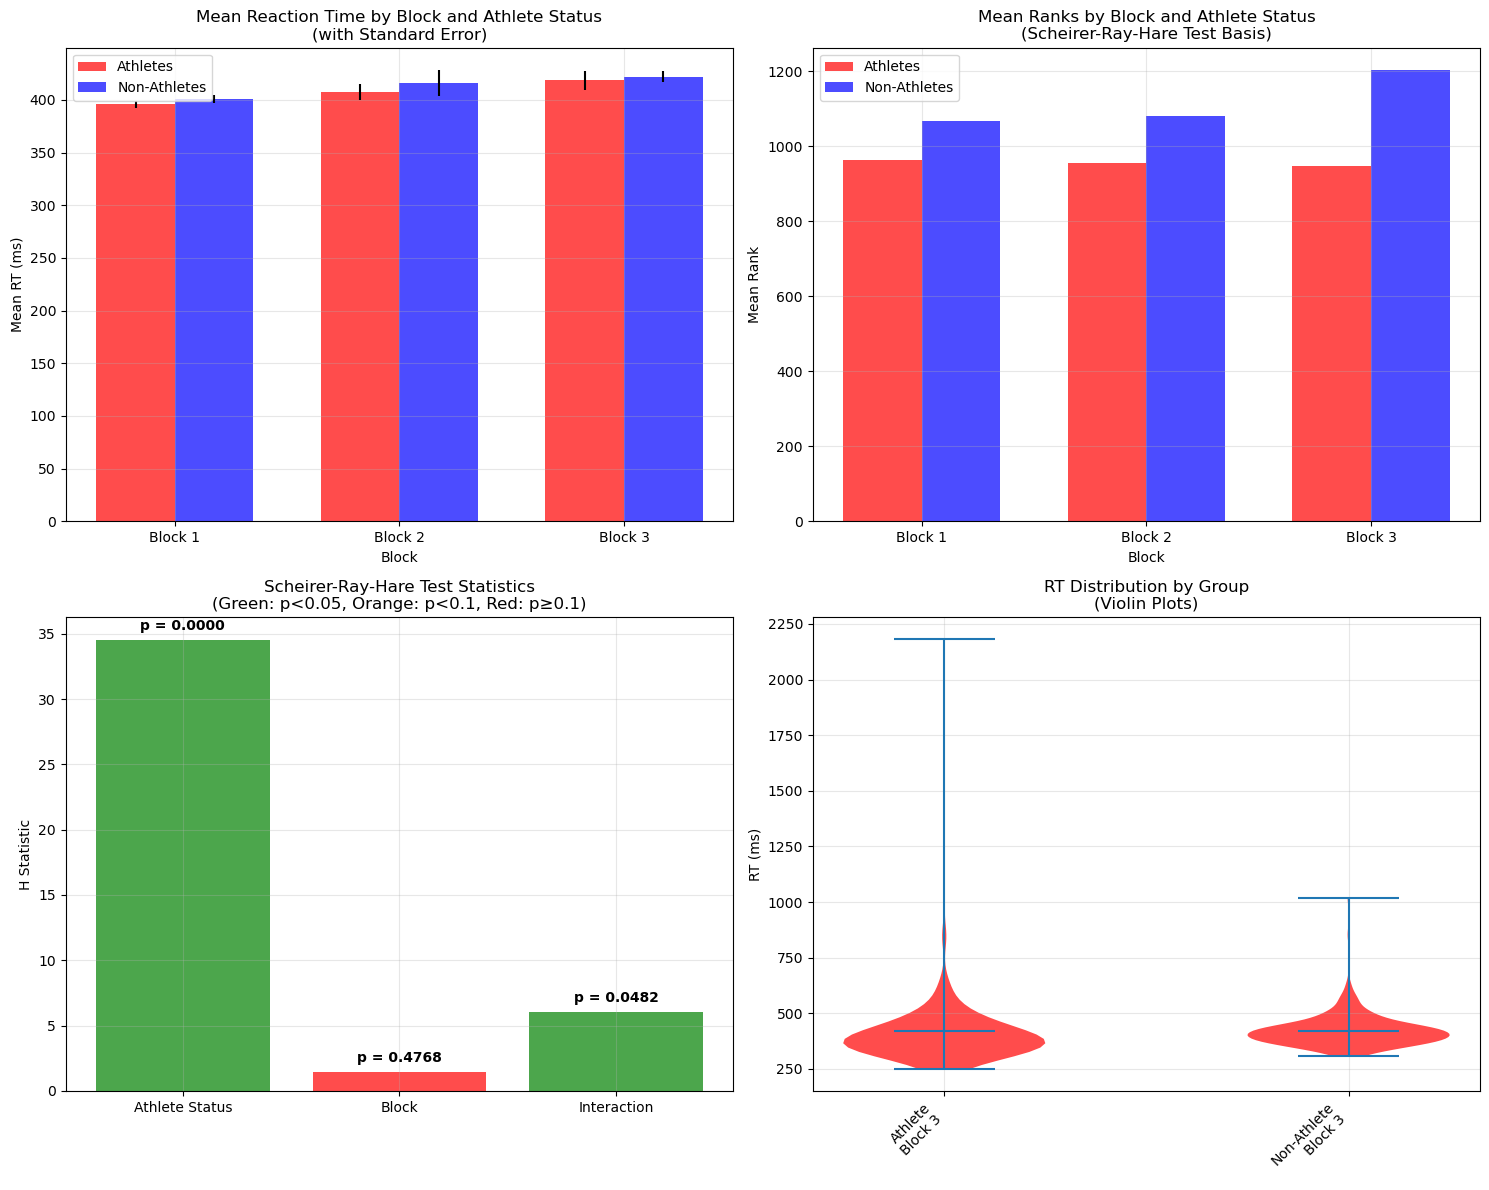


=== Group Statistics ===
  Athlete_Status    Block    mean     std  count
0        Athlete  Block 1  395.63   71.90    451
1        Athlete  Block 2  407.25  166.13    445
2        Athlete  Block 3  418.57  187.52    450
3    Non-Athlete  Block 1  400.60   57.57    223
4    Non-Athlete  Block 2  415.83  182.96    225
5    Non-Athlete  Block 3  421.74   76.99    224


In [18]:
from scipy.stats import rankdata

# Perform Scheirer-Ray-Hare test (non-parametric 2-way ANOVA)
import scipy.stats as stats

# Prepare data for Scheirer-Ray-Hare test
# Convert categorical variables to numeric codes
df_anova_copy = df_anova.copy()
df_anova_copy['Athlete_Code'] = df_anova_copy['Athlete_Status'].map({'Athlete': 1, 'Non-Athlete': 0})
df_anova_copy['Block_Code'] = df_anova_copy['Block'].map({'Block 1': 1, 'Block 2': 2, 'Block 3': 3})

# Rank the RT data
df_anova_copy['RT_Rank'] = rankdata(df_anova_copy['RT'])

# Calculate sum of squares for Scheirer-Ray-Hare test
n = len(df_anova_copy)
grand_mean_rank = (n + 1) / 2

# Group by factors
athlete_groups = df_anova_copy.groupby('Athlete_Code')['RT_Rank']
block_groups = df_anova_copy.groupby('Block_Code')['RT_Rank']
interaction_groups = df_anova_copy.groupby(['Athlete_Code', 'Block_Code'])['RT_Rank']

# Calculate H statistics for each effect
# Main effect A (Athlete Status)
n_athlete = athlete_groups.size()
sum_athlete = athlete_groups.sum()
H_A = (12 / (n * (n + 1))) * sum([(sum_athlete[i]**2) / n_athlete[i] for i in n_athlete.index]) - 3 * (n + 1)

# Main effect B (Block)
n_block = block_groups.size()
sum_block = block_groups.sum()
H_B = (12 / (n * (n + 1))) * sum([(sum_block[i]**2) / n_block[i] for i in n_block.index]) - 3 * (n + 1)

# Interaction effect AB
n_interaction = interaction_groups.size()
sum_interaction = interaction_groups.sum()
H_AB_total = (12 / (n * (n + 1))) * sum([(sum_interaction[i]**2) / n_interaction[i] for i in n_interaction.index]) - 3 * (n + 1)
H_AB = H_AB_total - H_A - H_B

# Calculate degrees of freedom
df_A = len(n_athlete) - 1  # 2 - 1 = 1
df_B = len(n_block) - 1    # 3 - 1 = 2
df_AB = df_A * df_B        # 1 * 2 = 2

# Calculate p-values using chi-square distribution
p_A = 1 - stats.chi2.cdf(H_A, df_A)
p_B = 1 - stats.chi2.cdf(H_B, df_B)
p_AB = 1 - stats.chi2.cdf(H_AB, df_AB)

print("\n=== Scheirer-Ray-Hare Test Results ===")
print(f"Main effect - Athlete Status: H = {H_A:.4f}, df = {df_A}, p = {p_A:.6f}")
print(f"Main effect - Block: H = {H_B:.4f}, df = {df_B}, p = {p_B:.6f}")
print(f"Interaction effect: H = {H_AB:.4f}, df = {df_AB}, p = {p_AB:.6f}")

# Create visualization of the statistical test results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Mean RT by group
means_data = df_anova.groupby(['Athlete_Status', 'Block'])['RT'].agg(['mean', 'std', 'count']).reset_index()
athlete_means = means_data[means_data['Athlete_Status'] == 'Athlete']
non_athlete_means = means_data[means_data['Athlete_Status'] == 'Non-Athlete']

x_pos = np.arange(len(blocks[1:]))  # Exclude training block
width = 0.35

ax1.bar(x_pos - width/2, athlete_means['mean'], width, label='Athletes', 
    color='red', alpha=0.7, yerr=athlete_means['std']/np.sqrt(athlete_means['count']))
ax1.bar(x_pos + width/2, non_athlete_means['mean'], width, label='Non-Athletes', 
    color='blue', alpha=0.7, yerr=non_athlete_means['std']/np.sqrt(non_athlete_means['count']))

ax1.set_xlabel('Block')
ax1.set_ylabel('Mean RT (ms)')
ax1.set_title('Mean Reaction Time by Block and Athlete Status\n(with Standard Error)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(blocks[1:])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rank means (for Scheirer-Ray-Hare visualization)
rank_means = df_anova_copy.groupby(['Athlete_Status', 'Block'])['RT_Rank'].mean().reset_index()
athlete_ranks = rank_means[rank_means['Athlete_Status'] == 'Athlete']
non_athlete_ranks = rank_means[rank_means['Athlete_Status'] == 'Non-Athlete']

ax2.bar(x_pos - width/2, athlete_ranks['RT_Rank'], width, label='Athletes', color='red', alpha=0.7)
ax2.bar(x_pos + width/2, non_athlete_ranks['RT_Rank'], width, label='Non-Athletes', color='blue', alpha=0.7)

ax2.set_xlabel('Block')
ax2.set_ylabel('Mean Rank')
ax2.set_title('Mean Ranks by Block and Athlete Status\n(Scheirer-Ray-Hare Test Basis)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(blocks[1:])
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Effect sizes visualization
effects = ['Athlete Status', 'Block', 'Interaction']
h_values = [H_A, H_B, H_AB]
p_values = [p_A, p_B, p_AB]

colors = ['green' if p < 0.05 else 'orange' if p < 0.1 else 'red' for p in p_values]
bars = ax3.bar(effects, h_values, color=colors, alpha=0.7)

ax3.set_ylabel('H Statistic')
ax3.set_title('Scheirer-Ray-Hare Test Statistics\n(Green: p<0.05, Orange: p<0.1, Red: p≥0.1)')
ax3.grid(True, alpha=0.3)

# Add p-values as text on bars
for i, (bar, p_val) in enumerate(zip(bars, p_values)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
         f'p = {p_val:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Distribution comparison
violin_data = []
labels = []
for athlete_status in ['Athlete', 'Non-Athlete']:
    for block in ['Block 1', 'Block 2', 'Block 3']:
        data = df_anova[(df_anova['Athlete_Status'] == athlete_status) & 
               (df_anova['Block'] == block)]['RT'].values
    violin_data.append(data)
    labels.append(f"{athlete_status}\n{block}")

parts = ax4.violinplot(violin_data, positions=range(len(violin_data)), showmeans=True)
ax4.set_xticks(range(len(labels)))
ax4.set_xticklabels(labels, rotation=45, ha='right')
ax4.set_ylabel('RT (ms)')
ax4.set_title('RT Distribution by Group\n(Violin Plots)')
ax4.grid(True, alpha=0.3)

# Color the violin plots
for i, pc in enumerate(parts['bodies']):
    if i < 3:  # Athletes
        pc.set_facecolor('red')
        pc.set_alpha(0.7)
    else:  # Non-athletes
        pc.set_facecolor('blue')
        pc.set_alpha(0.7)
plt.tight_layout()
plt.show()

# Print summary of group statistics
print("\n=== Group Statistics ===")
print(means_data.round(2))